In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics  
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import scipy.stats as stats


In [2]:
d1=pd.read_csv("BBCA.JK.csv")
d1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,5200.0,5200.0,5200.0,5200.0,4629.854492,0
1,2019-01-02,5200.0,5245.0,5200.0,5240.0,4665.467773,35956000
2,2019-01-03,5200.0,5220.0,5115.0,5180.0,4612.047363,72358000
3,2019-01-04,5175.0,5205.0,5125.0,5205.0,4634.305664,51465000
4,2019-01-07,5265.0,5325.0,5245.0,5245.0,4669.919922,73438000
...,...,...,...,...,...,...,...
1359,2024-07-24,10125.0,10175.0,10075.0,10075.0,10075.000000,24658000
1360,2024-07-25,10225.0,10300.0,10200.0,10300.0,10300.000000,98088100
1361,2024-07-26,10375.0,10400.0,10300.0,10325.0,10325.000000,75565800
1362,2024-07-29,10400.0,10425.0,10175.0,10250.0,10250.000000,69092500


In [3]:
d2=pd.read_csv("BBCA.JK_monthly.csv")
d2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5640.0,5115.0,5635.0,5017.159180,1859122000
1,2019-01-31,5680.0,5750.0,5335.0,5515.0,4910.316895,1493339500
2,2019-02-28,5565.0,5600.0,5425.0,5510.0,4905.864746,790477000
3,2019-03-31,5550.0,5805.0,5450.0,5750.0,5119.550293,989206000
4,2019-04-30,5750.0,5895.0,5140.0,5820.0,5229.244141,1700900500


In [4]:
d3=pd.read_csv("BBCA.JK_weekly.csv")
d3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5325.0,5115.0,5245.0,4669.919434,233217000
1,2019-01-07,5230.0,5320.0,5150.0,5200.0,4629.854492,437807000
2,2019-01-14,5230.0,5600.0,5190.0,5545.0,4937.026855,462381000
3,2019-01-21,5600.0,5620.0,5355.0,5495.0,4892.508789,435848500
4,2019-01-28,5445.0,5750.0,5440.0,5500.0,4896.961426,461434500


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1364 non-null   object 
 1   Open       1364 non-null   float64
 2   High       1364 non-null   float64
 3   Low        1364 non-null   float64
 4   Close      1364 non-null   float64
 5   Adj Close  1364 non-null   float64
 6   Volume     1364 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 74.7+ KB


In [6]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       67 non-null     object 
 1   Open       67 non-null     float64
 2   High       67 non-null     float64
 3   Low        67 non-null     float64
 4   Close      67 non-null     float64
 5   Adj Close  67 non-null     float64
 6   Volume     67 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ KB


In [7]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       292 non-null    object 
 1   Open       292 non-null    float64
 2   High       292 non-null    float64
 3   Low        292 non-null    float64
 4   Close      292 non-null    float64
 5   Adj Close  292 non-null    float64
 6   Volume     292 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.1+ KB


In [8]:
x=d1["Date"]
y=d1.drop("Date",axis=1)

**Mode** 
we are used it with categorical data 
it's more repeated observation
ex 1,2,2,2,3,3,3,3,5,7,8,8
mode=3

In [9]:
#we can get it by two ways first and easy way with pandas
y.mode()

,Open,High,Low,Close,Adj Close,Volume
0,9200.0,7400.0,8725.0,9050.0,8804.143555,0.0
1,NaN,7475.0,NaN,NaN,NaN,NaN
2,NaN,8900.0,NaN,NaN,NaN,NaN


In [10]:
#second way
from collections import Counter 
 

n = len(y["High"]) 
 
data = Counter(y["High"]) 
get_mode = dict(data) 
mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 
 
if len(mode) == n: 
    get_mode = "No mode found"
else: 
    get_mode = "Mode is / are: " + ', '.join(map(str, mode)) 
     
print(get_mode) 

Mode is / are: 7475.0, 7400.0, 8900.0


In [11]:
#we can get it by two ways first and easy way with pandas
mm=y.mean()
mm

Open         7.345891e+03
High         7.409465e+03
Low          7.278655e+03
Close        7.343420e+03
Adj Close    6.914786e+03
Volume       8.405591e+07
dtype: float64

In [12]:
#second way
n=len(y["High"])
get_sum=sum(y["High"])
mean=get_sum/n
print("mean =",mean)

mean = 7409.464809384164


In [13]:
#we can get it by two ways first and easy way with pandas
y["Volume"].median()

72485600.0

In [14]:
#second way
n_num =y["Volume"]
n=len(n_num)

if n%2==0:
    median1=n_num[n//2]
    median2=n_num[n//2-1]
    median=(median1+median2)/2
else:
    median=n_num[n//2]
print("Median is: " + str(median)) 

        

Median is: 115463500.0


In [15]:
n_num =y["Volume"]
print(n_num[n//2])

156848000


In [16]:
#range min,max
print("min of y",y.min())
print("max of y",y.max())


min of y Open         4450.000000
High         4800.000000
Low          4325.000000
Close        4430.000000
Adj Close    3992.931396
Volume          0.000000
dtype: float64
max of y Open             10400.0
High             10425.0
Low              10300.0
Close            10325.0
Adj Close        10325.0
Volume       756431600.0
dtype: float64


In [17]:
q1=y.quantile(0.25)
q3=y.quantile(0.75)
print("first quantile","\n",q1)
print("second quantile","\n",q3)

first quantile 
 Open         6.135000e+03
High         6.190000e+03
Low          6.055000e+03
Close        6.133750e+03
Adj Close    5.611048e+03
Volume       5.419305e+07
Name: 0.25, dtype: float64
second quantile 
 Open         8.725000e+03
High         8.825000e+03
Low          8.700000e+03
Close        8.750000e+03
Adj Close    8.349245e+03
Volume       9.846262e+07
Name: 0.75, dtype: float64


In [18]:
IQR=q3-q1
print(IQR)

Open         2.590000e+03
High         2.635000e+03
Low          2.645000e+03
Close        2.616250e+03
Adj Close    2.738196e+03
Volume       4.426958e+07
dtype: float64


In [19]:
def blackbox(x):
    plt.boxplot(x)
    fig = plt.figure(figsize =(10, 7))

    plt.show()


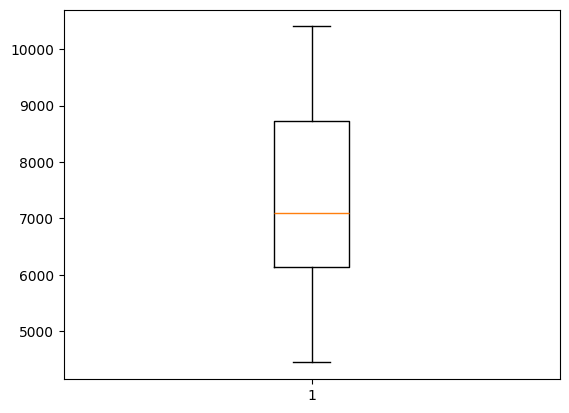

<Figure size 1000x700 with 0 Axes>

In [20]:
blackbox(y["Open"])

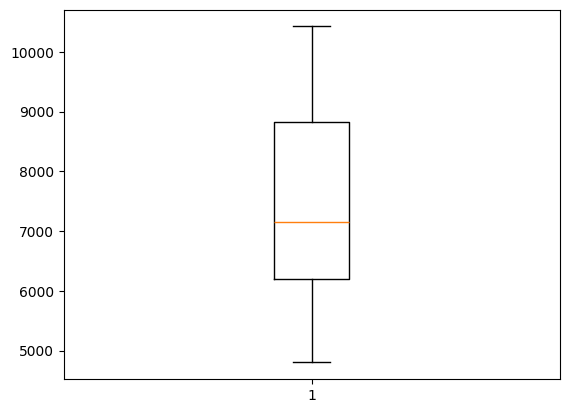

<Figure size 1000x700 with 0 Axes>

In [21]:
blackbox(y["High"])

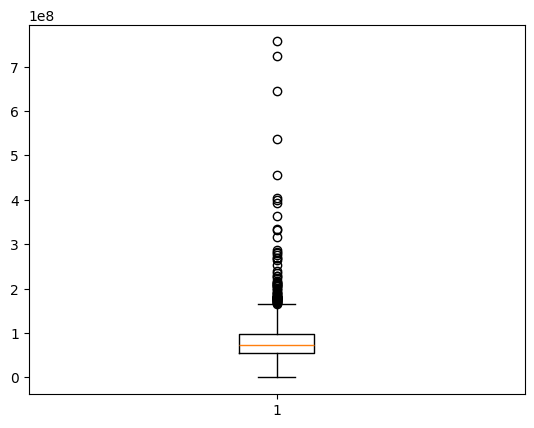

<Figure size 1000x700 with 0 Axes>

In [22]:
blackbox(y["Volume"])

In [23]:
length= int(len(y))
mean = sum(y["High"]) / length 
variance = sum((i - mean) ** 2 for i in y["High"]) / (length-1)
print(variance)

2064789.2951657043


In [24]:
statistics.variance(y["High"])

2064789.295165701

In [25]:
length=int(len(y["High"]))
mean=sum(y["High"])/length
variance==sum((i-mean)**2 for i in y["High"])/(length-1)
std=np.sqrt(variance)
print(std)

1436.9374708614514


In [26]:
std=np.std(y)
print(std)

Open         1.431651e+03
High         1.436411e+03
Low          1.429689e+03
Close        1.433567e+03
Adj Close    1.568880e+03
Volume       5.608266e+07
dtype: float64


In [27]:
length=int(len(y["High"]))
mean=sum(y["High"])/length
variance==sum((i-mean)**2 for i in y["High"])/(length-1)
std=np.sqrt(variance)
z=[(i-mean)/std for i in y["High"]]
print(z)

[-1.5376207066683136, -1.5063041038846015, -1.5237022165422194, -1.5341410841367902, -1.4506301433802244, -1.454109765911748, -1.454109765911748, -1.4680282560378421, -1.4680282560378421, -1.5132633489476486, -1.4958652362900309, -1.478467123632413, -1.4471505208487008, -1.381037692749753, -1.259250904146428, -1.2453324140203337, -1.259250904146428, -1.3392822223714702, -1.3149248646508052, -1.3184044871823286, -1.2940471294616638, -1.2870878843986167, -1.2314139238942394, -1.1548622282007208, -1.234893546425763, -1.3288433547768994, -1.301006374524711, -1.3044859970562344, -1.3044859970562344, -1.307965619587758, -1.307965619587758, -1.3358025998399465, -1.3949561828758472, -1.3914765603443238, -1.3288433547768994, -1.3427618449029937, -1.2627305266779516, -1.2870878843986167, -1.3114452421192815, -1.3288433547768994, -1.29056750693014, -1.2801286393355695, -1.2731693942725224, -1.259250904146428, -1.301006374524711, -1.325363732245376, -1.29056750693014, -1.3358025998399465, -1.28012

In [28]:
y.apply(zscore)

,Open,High,Low,Close,Adj Close,Volume
0,-1.498892,-1.538185,-1.453921,-1.495166,-1.456410,-1.498786
1,-1.498892,-1.506857,-1.453921,-1.467263,-1.433710,-0.857661
2,-1.498892,-1.524261,-1.513374,-1.509117,-1.467760,-0.208583
3,-1.516354,-1.534704,-1.506380,-1.491678,-1.453572,-0.581123
4,-1.453490,-1.451162,-1.422445,-1.463775,-1.430872,-0.189326
...,...,...,...,...,...,...
1359,1.941191,1.925310,1.955911,1.905443,2.014313,-1.059114
1360,2.011041,2.012332,2.043343,2.062394,2.157727,0.250205
1361,2.115815,2.081950,2.113288,2.079833,2.173662,-0.151386
1362,2.133277,2.099355,2.025856,2.027516,2.125857,-0.266810


In [29]:
c = np.corrcoef(y['High'],y['Volume'])
print(c)

[[1.         0.00531055]
 [0.00531055 1.        ]]


In [30]:
corr = y.corr(method = 'pearson')
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998594,0.998975,0.997714,0.996121,-0.014998
High,0.998594,1.000000,0.998295,0.998750,0.997269,0.005311
Low,0.998975,0.998295,1.000000,0.998866,0.996853,-0.027245
Close,0.997714,0.998750,0.998866,1.000000,0.998021,-0.011806
Adj Close,0.996121,0.997269,0.996853,0.998021,1.000000,-0.004244
Volume,-0.014998,0.005311,-0.027245,-0.011806,-0.004244,1.000000


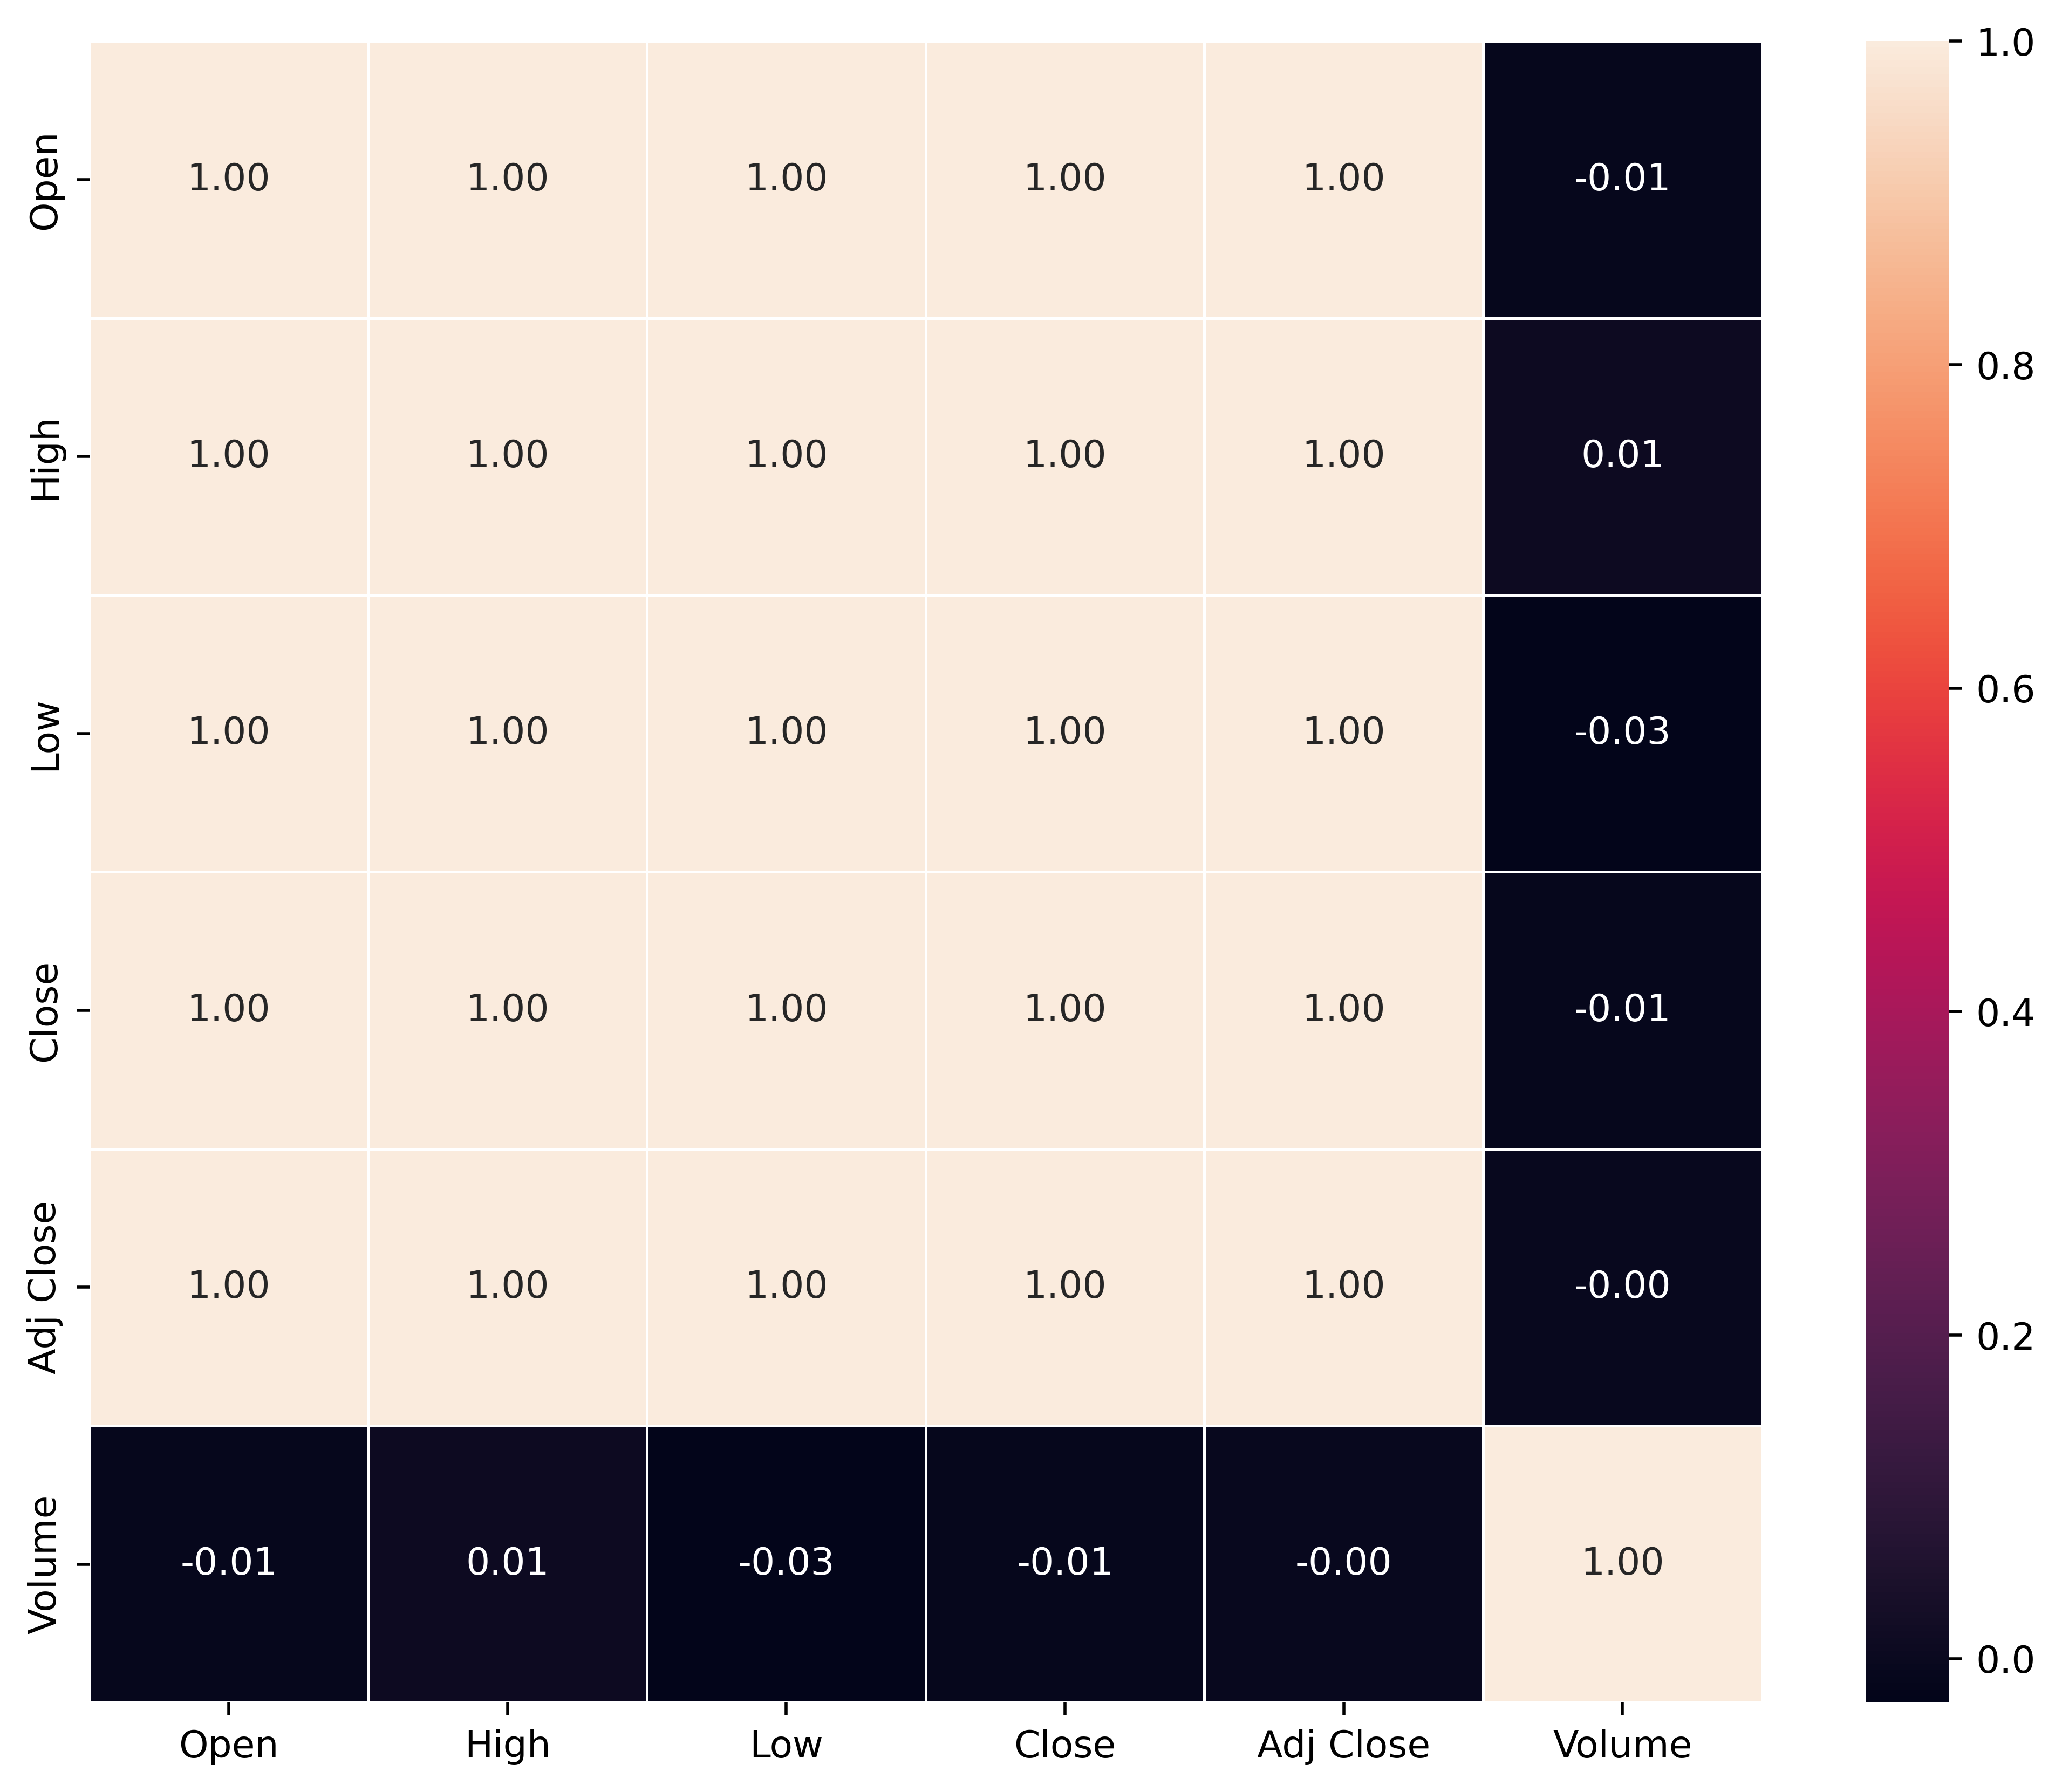

In [31]:

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

# Contingency Table

corolation between two cateogrical data

In [34]:
import pandas as pd
dataimdb=pd.read_csv("BBCA.JK_weekly.csv")

In [35]:
dataimdb

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,5200.0,5325.0,5115.0,5245.0,4669.919434,233217000
1,2019-01-07,5230.0,5320.0,5150.0,5200.0,4629.854492,437807000
2,2019-01-14,5230.0,5600.0,5190.0,5545.0,4937.026855,462381000
3,2019-01-21,5600.0,5620.0,5355.0,5495.0,4892.508789,435848500
4,2019-01-28,5445.0,5750.0,5440.0,5500.0,4896.961426,461434500
...,...,...,...,...,...,...,...
287,2024-07-01,10000.0,10050.0,9825.0,10050.0,10050.000000,311613200
288,2024-07-08,10100.0,10225.0,9950.0,10050.0,10050.000000,279416600
289,2024-07-15,9975.0,10150.0,9800.0,10100.0,10100.000000,278407500
290,2024-07-22,10200.0,10425.0,10075.0,10250.0,10250.000000,306725500


# Probabilities 

 sample and population
 
 sample is a random variables from population

In [37]:
sample=y.sample(100)
sample

,Open,High,Low,Close,Adj Close,Volume
1220,8700.0,8750.0,8700.0,8700.0,8504.034180,87589300
1092,9125.0,9175.0,9075.0,9100.0,8852.786133,87492200
1052,8675.0,8800.0,8625.0,8800.0,8560.935547,101068200
847,7500.0,7575.0,7500.0,7500.0,7125.452148,107828300
909,8300.0,8350.0,8250.0,8275.0,7861.748535,67079900
...,...,...,...,...,...,...
129,5995.0,6025.0,5965.0,5990.0,5381.988770,56612500
479,6480.0,6490.0,6380.0,6385.0,5854.538086,87361500
517,6820.0,6930.0,6705.0,6790.0,6244.750977,97920000
775,7675.0,7825.0,7650.0,7825.0,7322.007324,71968800


In [38]:
df_s = sample.groupby('High')['Open'].value_counts() / sample.groupby('High')['Open'].count()
df_f = df_s.reset_index(name='cpt')
df_f

,High,Open,cpt
0,4995.0,4450.0,1.0
1,5300.0,5280.0,1.0
2,5340.0,5340.0,1.0
3,5505.0,5500.0,1.0
4,5515.0,5515.0,1.0
...,...,...,...
93,9975.0,9950.0,0.5
94,10075.0,10050.0,1.0
95,10100.0,10025.0,0.5
96,10100.0,10050.0,0.5


In [39]:
m=sample["High"]
n=sample["Open"]
m=np.array(m).reshape(-1,1)
n=np.array(n).reshape(-1,1)

In [40]:
x_train, x_val, y_train, y_val = train_test_split(m, n, test_size=0.50, random_state = 44,shuffle=True)


In [41]:
gaus=GaussianNB()
gaus.fit(x_train,y_train)
score=gaus.score(x_train,y_train)
y_pred=gaus.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print("score",score)
print("y_pred",y_pred)
print("accuracy",accuracy)

score 0.96
y_pred [ 8900.  6000.  6820.  6200.  6820.  6800.  8900.  8900.  8900.  8900.
  9600.  6000.  6000.  8900.  6000.  6000.  6800.  8675.  6800.  8900.
  9325.  8675.  8900.  8900.  5680.  8675.  6820.  6820.  9150.  6800.
  6800.  8900.  6820.  6800.  8675.  6000.  6800.  6800.  9800.  6820.
  6000.  5555.  6000.  7800.  6800.  6800.  6000. 10025.  9075.  8900.]
accuracy 0.06


In [43]:
#calc mean and std
mean=y["High"].mean()
std=y["High"].std()
s = np.random.normal(mean, std, 100) 
print("mean",mean)
print("std",std)

mean 7409.464809384164
std 1436.9374708614514


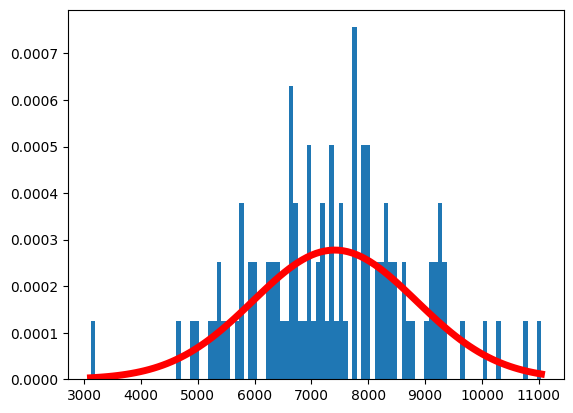

In [44]:
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mean)**2 / (2 * std**2) ),
                 linewidth=5, color='r')

plt.show()

In [45]:
z=(8950.0-mean)/std
prob = norm.cdf(z)
percent = prob * 100
print(z,prob,percent)

1.0720961919743641 0.8581615854534289 85.81615854534289


In [46]:
z=(8950.0-mean)/std
prob = norm.cdf(z)
percent = (1-prob) * 100
print(z,prob,percent)

1.0720961919743641 0.8581615854534289 14.18384145465711
